# Server Setup

_(Do not run the following in this Jupyter Notebook. These are shell scripts and must be executed on the server)_

## 1. Setup Tunning via Cloudflared

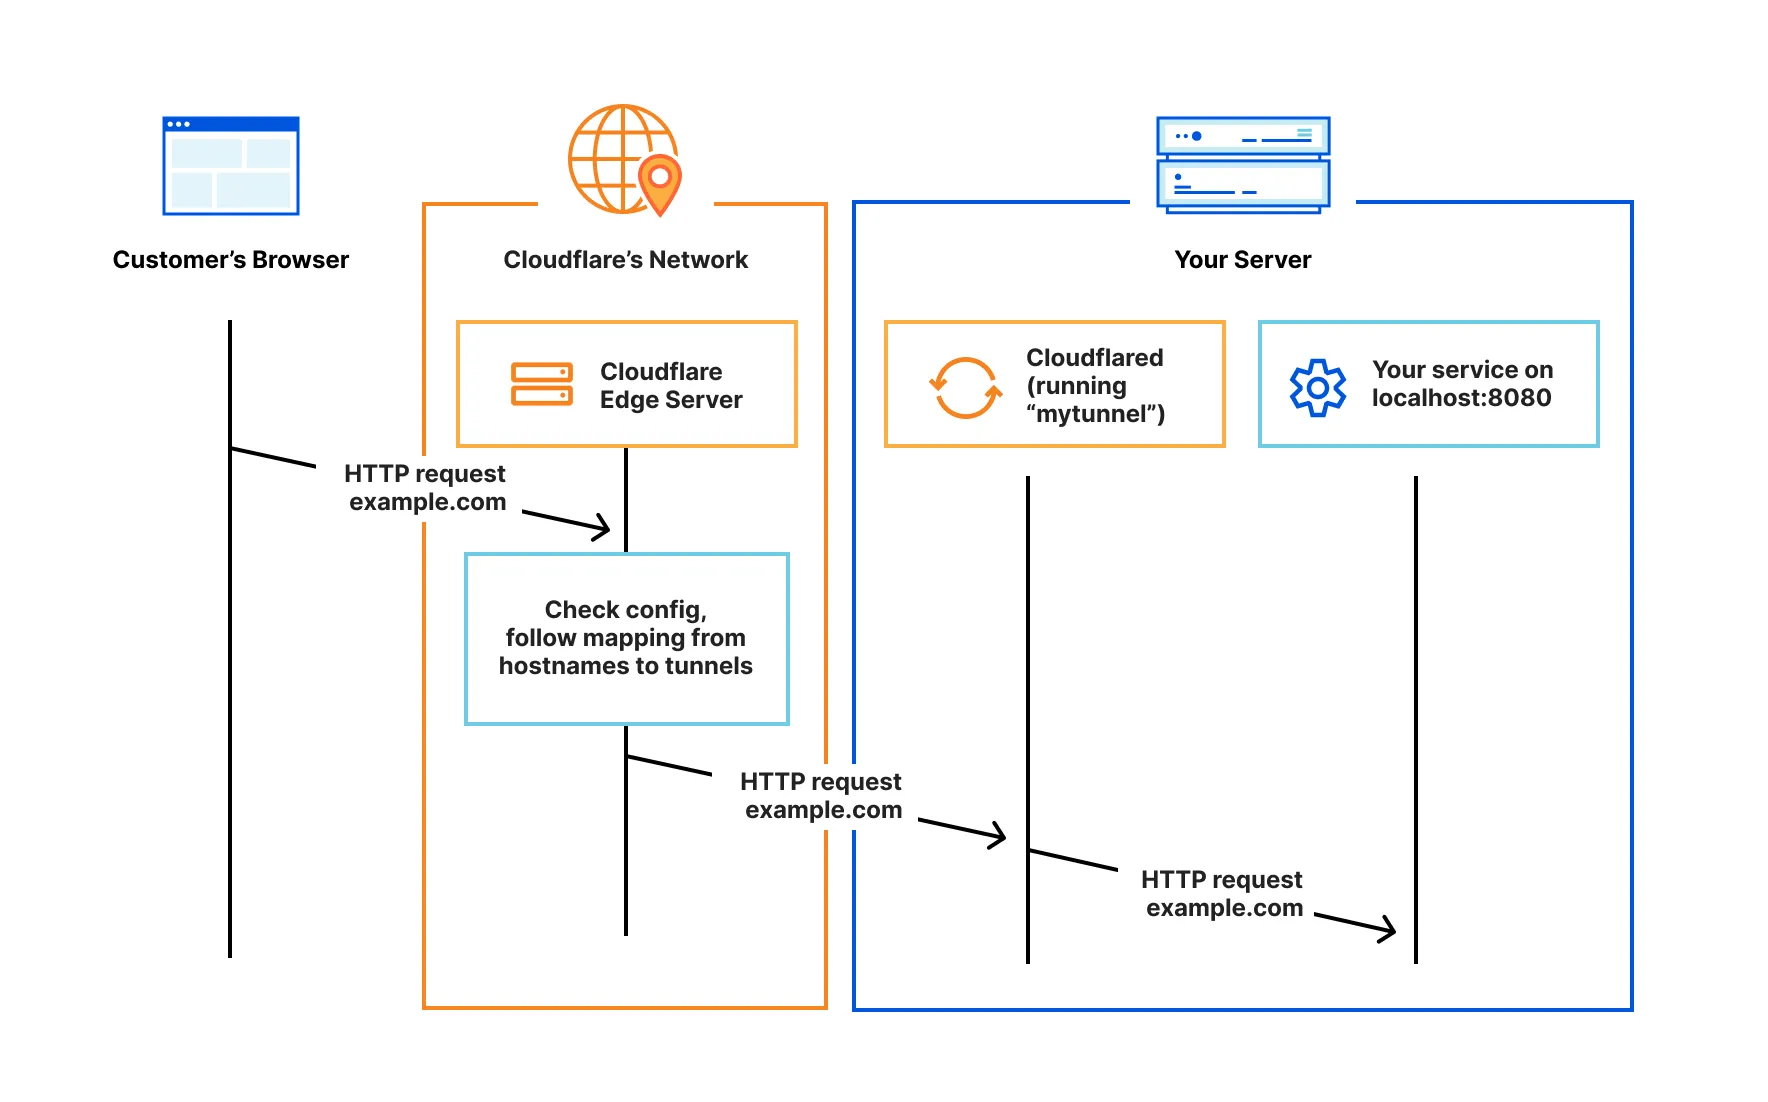

## 2. Setup SSH

In [ ]:
# Install necessary packages
sudo apt update -y
sudo apt install -y openssh-server ufw

# Start and Enable SSH Service
sudo systemctl start ssh
sudo systemctl enable ssh

# Allow firewall for ssh port
sudo ufw allow ssh

## 3. Access the server via SSH

In [ ]:
SERVER_DNS=
SERVER_USER=
ssh -o ProxyCommand="cloudflared access ssh --hostname ${SERVER_DNS}" ${SERVER_USER}@${SERVER_DNS}
# Type the server user's password.

For example:

In [ ]:
ssh -o ProxyCommand="cloudflared access ssh --hostname ai-elevate-dev.binhql.com" thuy@ai-elevate-dev.binhql.com
# Type the server user's password.

## 4. Setup port-forward as a systemd service

Create a shell executable file at `~/cluster/port-forward.sh`:

First, create the directory and the script file:

In [ ]:
mkdir -p ~/cluster
cat > ~/cluster/port-forward.sh << 'EOF'
#!/bin/bash
kubectl -n cattle-system port-forward svc/rancher 8088:80 &
EOF
chmod +x ~/cluster/port-forward.sh

Create a systemd service unit file `/etc/systemd/system/cluster_port_forward.service`:

In [ ]:
sudo tee /etc/systemd/system/cluster_port_forward.service << 'EOF'
[Unit]
Description=Kubernetes Port Forward Service for Rancher
After=network.target
Wants=network-online.target

[Service]
ExecStart=/home/thuy/cluster/port-forward.sh
Type=simple
User=thuy
Group=thuy
WorkingDirectory=/home/thuy
Environment=HOME=/home/thuy
Environment=KUBECONFIG=/home/thuy/.kube/config

[Install]
WantedBy=multi-user.target
EOF

In [ ]:
sudo systemctl daemon-reload
sudo systemctl enable cluster_port_forward.service
sudo systemctl start cluster_port_forward.service
sudo systemctl status cluster_port_forward.service